In [238]:
#数据处理
import os
import re
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict
from collections import Counter
#画图
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
#NLP
from nltk.corpus import stopwords
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
stop = set(stopwords.words('english'))
import gensim
import string
#训练
import torch


In [239]:
print(os.getcwd())
tweet = pd.read_csv(r'..\data\train.csv')
test = pd.read_csv(r'..\data\test.csv')
print(tweet.head(3))
test.shape


d:\一些资料\实验室\Kaggle入门\pytorch_60mins_learning
   id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   

   target  
0       1  
1       1  
2       1  


(3263, 4)

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Train samples')

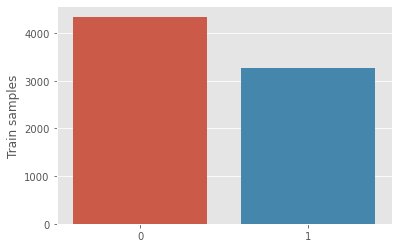

In [240]:
x = tweet.target.value_counts()
sns.barplot(x.index, x)
plt.gca().set_ylabel('Train samples')


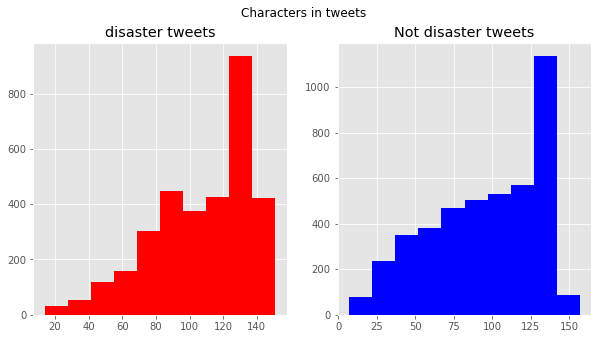

In [241]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
tweet_len = tweet[tweet['target'] == 1]['text'].str.len()
ax1.hist(tweet_len, color='red')
ax1.set_title('disaster tweets')
tweet_len = tweet[tweet['target'] == 0]['text'].str.len()
ax2.hist(tweet_len, color='blue')
ax2.set_title('Not disaster tweets')
fig.suptitle('Characters in tweets')
plt.show()


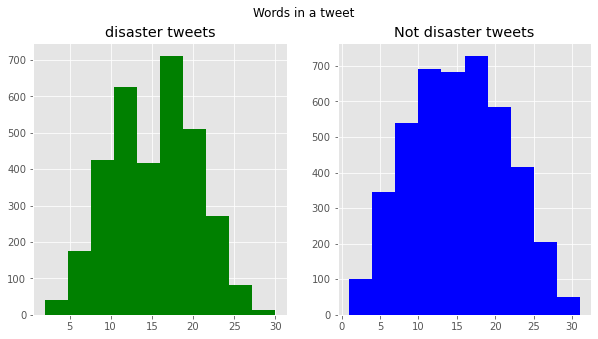

In [242]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
tweet_len = tweet[tweet['target'] ==
                  1]['text'].str.split().map(lambda x: len(x))
ax1.hist(tweet_len, color='green')
ax1.set_title('disaster tweets')
tweet_len = tweet[tweet['target'] ==
                  0]['text'].str.split().map(lambda x: len(x))
ax2.hist(tweet_len, color='blue')
ax2.set_title('Not disaster tweets')
fig.suptitle('Words in a tweet')
plt.show()


D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0.98, 'Average word length in each tweet')

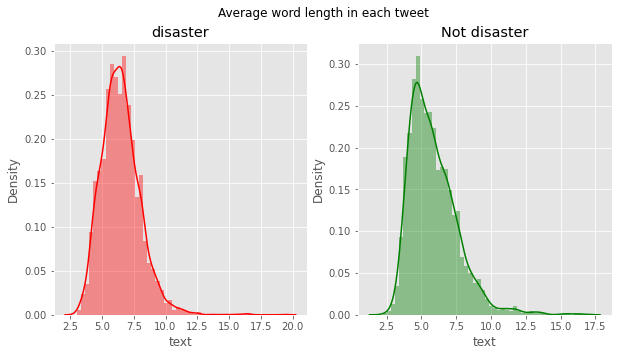

In [243]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
word = tweet[tweet['target'] == 1]['text'].str.split().apply(lambda x: [
    len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)), ax=ax1, color='red')
ax1.set_title('disaster')
word = tweet[tweet['target'] == 0]['text'].str.split().apply(lambda x: [
    len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)), ax=ax2, color='green')
ax2.set_title('Not disaster')
fig.suptitle('Average word length in each tweet')


In [244]:
def create_corpus(target):
    corpus = []

    for x in tweet[tweet['target'] == target]['text'].str.split():
        for i in x:
            corpus.append(i)
    return corpus


In [245]:
corpus = create_corpus(0)

dic = defaultdict(int)  # 当字典里的key不存在但被查找时，返回的不是keyError而是一个默认值(0)
for word in corpus:
    if word in stop:
        dic[word] += 1

# list的sort方法返回的是对已经存在的列表进行操作，无返回值;
# 而内建函数sorted方法返回的是一个新的list，而不是在原来的基础上进行的操作。
# dic.items()返回可遍历的(键, 值) 元组数组
top = sorted(dic.items(), key=lambda x: x[1], reverse=True)[:10]#计算target = 0的推文中使用最多的word TOP10
print(type(top),top)

<class 'list'> [('the', 1524), ('a', 1115), ('to', 1099), ('and', 840), ('of', 834), ('in', 720), ('you', 529), ('is', 512), ('for', 452), ('my', 442)]


<BarContainer object of 10 artists>

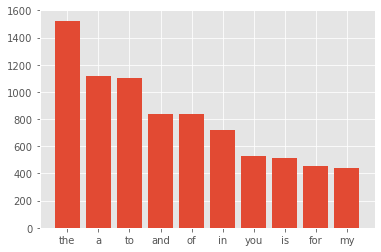

In [246]:
#zip() 函数用于将可迭代的对象作为参数，
# 将对象中对应的元素打包成一个个元组，
# 然后返回由这些元组组成的对象

x, y = zip(*top)
plt.bar(x, y)#plt.bar绘制柱状图


<BarContainer object of 10 artists>

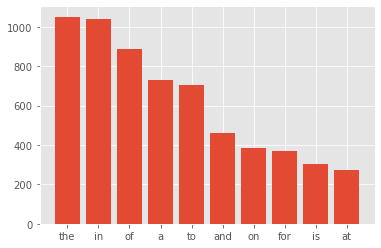

In [247]:
corpus = create_corpus(1)

dic = defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word] += 1

top = sorted(dic.items(), key=lambda x: x[1], reverse=True)[:10]


x, y = zip(*top)
plt.bar(x, y)


<BarContainer object of 18 artists>

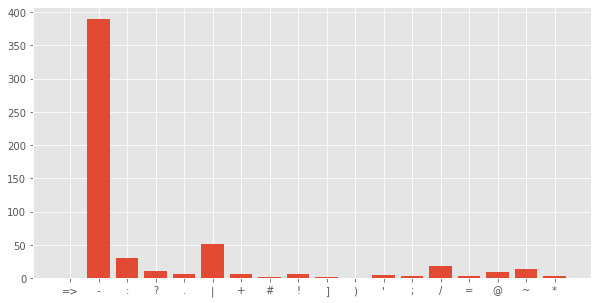

In [248]:
import string
plt.figure(figsize=(10, 5))
corpus = create_corpus(1)

dic = defaultdict(int)
special = string.punctuation  # 返回所有标点符号
for i in corpus:
    if i in special:
        dic[i] += 1

x, y = zip(*dic.items())
plt.bar(x, y)


<BarContainer object of 20 artists>

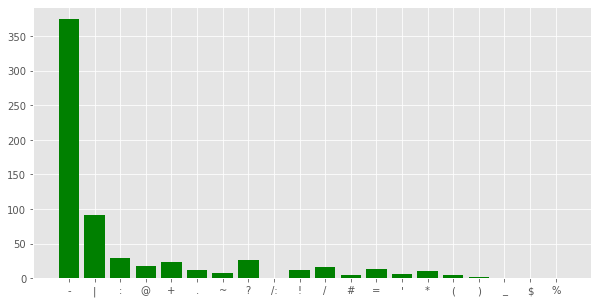

In [249]:

import string
plt.figure(figsize=(10, 5))
corpus = create_corpus(0)

dic = defaultdict(int)
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i] += 1

x, y = zip(*dic.items())
plt.bar(x, y, color='green')


<AxesSubplot:>

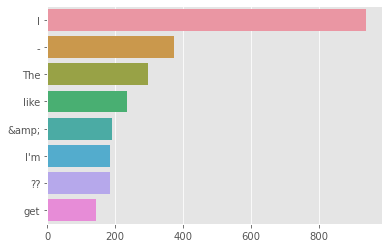

In [250]:
counter = Counter(corpus) #计数器，返回计数字典
most = counter.most_common()
x = []
y = []
for word, count in most[:40]:#计算前四十个
    if (word not in stop):
        x.append(word)
        y.append(count)
sns.barplot(x=y, y=x)


<AxesSubplot:>

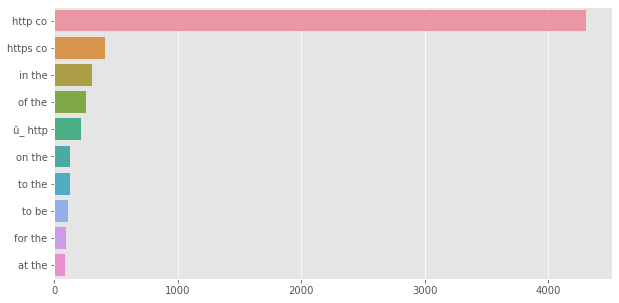

In [251]:
def get_top_tweet_bigrams(corpus,n = None):
    vec = CountVectorizer(ngram_range=(2,2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word,sum_words[0,idx]) for word,idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq,key = lambda x:x[1],reverse=True)
    return words_freq[:n]

plt.figure(figsize=(10, 5))
top_tweet_bigrams = get_top_tweet_bigrams(tweet['text'])[:10]
x, y = map(list, zip(*top_tweet_bigrams))
sns.barplot(x=y, y=x)


In [252]:
df = pd.concat([tweet, test])
df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1.0
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1.0
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1.0
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1.0
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1.0
...,...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,NaN
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...,NaN
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...,NaN
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...,NaN


In [253]:
#Remove urls
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+') # 正则表达式匹配
    return url.sub(r'', text)


df['text'] = df['text'].apply(lambda x: remove_URL(x))

#Remove HTML tags
def remove_html(text):
    html = re.compile(r'<.*?>')
    return html.sub(r'', text)
df['text']=df['text'].apply(lambda x : remove_html(x))

#Remove emojis
def remove_emoji(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)
df['text'] = df['text'].apply(lambda x: remove_emoji(x))

#Remove punctuations
def remove_punct(text):
    table = str.maketrans('', '', string.punctuation)
    return text.translate(table)
df['text'] = df['text'].apply(lambda x: remove_punct(x))

#Spelling Correction
from spellchecker import SpellChecker
spell = SpellChecker()
def correct_spellings(text):
    corrected_text = []
    misspelled_words = spell.unknown(text.split())
    for word in text.split():
        if word in misspelled_words:
            corrected_text.append(spell.correction(word))
        else:
            corrected_text.append(word)
    return " ".join('%s' %i for i in corrected_text)

#df['text']=df['text'].apply(lambda x : correct_spellings(x))
df.iloc[0:len(tweet)].to_csv(r'./usetrain.csv')
df.iloc[len(tweet):].to_csv(r'./usetest.csv')




In [254]:
'''
from tqdm import tqdm
def create_corpus(df):
    corpus = []
    for tweet in tqdm(df['text']):# tadm()是进度条加载函数
        words = [word.lower() for word in word_tokenize(
            tweet) if((word.isalpha() == 1) & (word not in stop))]
        corpus.append(words)
    return corpus

corpus = create_corpus(df)
corpus
'''


"\nfrom tqdm import tqdm\ndef create_corpus(df):\n    corpus = []\n    for tweet in tqdm(df['text']):# tadm()是进度条加载函数\n        words = [word.lower() for word in word_tokenize(\n            tweet) if((word.isalpha() == 1) & (word not in stop))]\n        corpus.append(words)\n    return corpus\n\ncorpus = create_corpus(df)\ncorpus\n"

In [255]:
'''
embedding_dict = {}
with open(r'../data/glove.6B.100d.txt', 'r') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vectors = np.asarray(values[1:], 'float32')
        embedding_dict[word] = vectors
f.close()

MAX_LEN = 50
tokenizer_obj = Tokenizer()
tokenizer_obj.fit_on_texts(corpus) #is used to update the internal vocabulary for the texts list.
sequences = tokenizer_obj.texts_to_sequences(corpus)
tweet_pad = pad_sequences(sequences, maxlen=MAX_LEN,
                          truncating='post', padding='post')

word_index = tokenizer_obj.word_index
num_words = len(word_index)+1
embedding_matrix = np.zeros((num_words, 100))

for word, i in tqdm(word_index.items()):
    if i > num_words:
        continue

    emb_vec = embedding_dict.get(word)
    if emb_vec is not None:
        embedding_matrix[i] = emb_vec
'''
'''
def create_corpus(df):
    corpus = []
    for tweet in tqdm(df['text']):# tadm()是进度条加载函数
        words = [word.lower() for word in tokenizer(tweet) if((word.isalpha() == 1) & (word not in stop))]
        corpus.append(words)
    return corpus

corpus = create_corpus(df)
corpus
'''

"\ndef create_corpus(df):\n    corpus = []\n    for tweet in tqdm(df['text']):# tadm()是进度条加载函数\n        words = [word.lower() for word in tokenizer(tweet) if((word.isalpha() == 1) & (word not in stop))]\n        corpus.append(words)\n    return corpus\n\ncorpus = create_corpus(df)\ncorpus\n"

这里本是用keras自带的Tokenizer()进行文本的tokenize。

fit_on_texts()函数用于更新内部词汇表，其返回的对象包含了“word_counts”（单词数量的字典）、"word_docs"（每个单词出现在多少个文档中）、"word_index"（每个单词的编码字典）和"document_count"（文本数量）四个属性。

texts_to_sequences()函数将输入的语料库根据word_index从字符串映射成对应的数字。“texts_to_sequences method helps in converting tokens of text corpus into a sequence of integers.”

pad_sequences()函数用于将所有文本填充至maxlen长度，多余截断少于填充0.

由于我们选取glove嵌入是100维度的，故生成的矩阵应该是(num_words, 100)的。


In [256]:
from torchtext.legacy import data 
from torchtext.vocab import GloVe
from torchtext.data import get_tokenizer
from tqdm import tqdm

tokenizer = get_tokenizer("basic_english")

#定义数据处理方式
TEXT = data.Field(sequential=True,tokenize = tokenizer,lower = True)
LABEL = data.Field(sequential=False,
                    use_vocab=False,
                   preprocessing=data.Pipeline(
                       lambda x: int(float(x)),)
                    )

#从表格导入数据集
train1 = data.TabularDataset(
    path=r'./'+'usetrain.csv',
    format = 'csv',
    skip_header=True,#如果不加会把标题也读进去
    fields=[('',None), ('id',None), ('keyword',None), ('location',None),
            ('text', TEXT), ('target', LABEL)]  # 对应的列用对应处理方式
)
test = data.TabularDataset(
    path=r'./'+'usetest.csv',
    format = 'csv',
    skip_header=True,
    fields=[('',None), ('id',None), ('keyword',None), ('location',None),
            ('text', TEXT), ('target', None)]  
)
#导入对应embedding，自动下载的文件存储在./.vector_cache
TEXT.build_vocab(train1,vectors = GloVe(name='6B', dim=100))

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

#batch操作
train_iter, test_iter = data.Iterator.splits( 
    (train1, test), 
    #sort_key=lambda x: len(x.text),
    batch_sizes=(32,256), 
    device=device,
    )



In [257]:
for i in train1:
    print('len = ',len(i.text))
    print(i.text)


len =  13
['our', 'deeds', 'are', 'the', 'reason', 'of', 'this', 'earthquake', 'may', 'allah', 'forgive', 'us', 'all']
len =  7
['forest', 'fire', 'near', 'la', 'ronge', 'sask', 'canada']
len =  22
['all', 'residents', 'asked', 'to', 'shelter', 'in', 'place', 'are', 'being', 'notified', 'by', 'officers', 'no', 'other', 'evacuation', 'or', 'shelter', 'in', 'place', 'orders', 'are', 'expected']
len =  8
['13000', 'people', 'receive', 'wildfires', 'evacuation', 'orders', 'in', 'california']
len =  16
['just', 'got', 'sent', 'this', 'photo', 'from', 'ruby', 'alaska', 'as', 'smoke', 'from', 'wildfires', 'pours', 'into', 'a', 'school']
len =  16
['rockyfire', 'update', 'california', 'hwy', '20', 'closed', 'in', 'both', 'directions', 'due', 'to', 'lake', 'county', 'fire', 'cafire', 'wildfires']
len =  14
['flood', 'disaster', 'heavy', 'rain', 'causes', 'flash', 'flooding', 'of', 'streets', 'in', 'manitou', 'colorado', 'springs', 'areas']
len =  15
['im', 'on', 'top', 'of', 'the', 'hill', 'and

In [258]:
#iter test
i = 0
for batch in train_iter:
    print(i)
    i +=1
    print('len(batch.text) = ',batch.text.shape)
    #print('batch.text = ',batch.text)
    #print('batch.target = ',batch.target)

0
len(batch.text) =  torch.Size([24, 32])
1
len(batch.text) =  torch.Size([24, 32])
2
len(batch.text) =  torch.Size([28, 32])
3
len(batch.text) =  torch.Size([24, 32])
4
len(batch.text) =  torch.Size([27, 32])
5
len(batch.text) =  torch.Size([28, 32])
6
len(batch.text) =  torch.Size([23, 32])
7
len(batch.text) =  torch.Size([20, 32])
8
len(batch.text) =  torch.Size([28, 32])
9
len(batch.text) =  torch.Size([23, 32])
10
len(batch.text) =  torch.Size([31, 32])
11
len(batch.text) =  torch.Size([26, 32])
12
len(batch.text) =  torch.Size([28, 32])
13
len(batch.text) =  torch.Size([23, 32])
14
len(batch.text) =  torch.Size([27, 32])
15
len(batch.text) =  torch.Size([20, 32])
16
len(batch.text) =  torch.Size([26, 32])
17
len(batch.text) =  torch.Size([29, 32])
18
len(batch.text) =  torch.Size([24, 32])
19
len(batch.text) =  torch.Size([27, 32])
20
len(batch.text) =  torch.Size([27, 32])
21
len(batch.text) =  torch.Size([27, 32])
22
len(batch.text) =  torch.Size([25, 32])
23
len(batch.text) = 

In [259]:
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

class my_model(nn.Module):
    def __init__(self,input_dim,embedding_dim,hidden_dim,output_dim):
        super().__init__()
        self.embedding = nn.Embedding(input_dim, embedding_dim)
        self.rnn = nn.RNN(embedding_dim,hidden_dim)
        self.dense = nn.Linear(hidden_dim,output_dim)

    def forward(self,x):
        #embedding
        x = self.embedding(x)

        #partial droupout 1D
        x = x.permute(0, 2, 1)   # convert to [batch, channels, time]
        x = F.dropout2d(x, 0.2, training=self.training)
        x = x.permute(0, 2, 1)   # back to [batch, time, channels]

        #LSTM
        x,hidden = self.rnn(x)

        x = x[-1]
        #Dense & Activation
        x = F.sigmoid(self.dense(hidden))

        return x

        


In [260]:
INPUT_DIM = len(TEXT.vocab)
EMBEDDING_DIM = 100
HIDDEN_DIM = 64
OUTPUT_DIM = 1

model = my_model(INPUT_DIM, EMBEDDING_DIM, HIDDEN_DIM, OUTPUT_DIM)

#导入glove权重
model.embedding.weight.data = TEXT.vocab.vectors
model.embedding.weight.requires_grad = False

#选择优化器与损失函数
#class_weights = torch.tensor([1.0, 1.0])
optim = optim.Adam(model.parameters(),lr=1e-5)
criterion = nn.CrossEntropyLoss()

In [261]:
def binary_accuracy(preds, y):
    preds, ind = torch.max(F.softmax(preds, dim=-1), 1)
    correct = (ind == y).float()
    acc = correct.sum()/float(len(correct))
    return acc

In [262]:
import pyprind
def mytrain(model,iterator,optimizer,criterion):
    epoch_loss = 0
    epoch_acc = 0

    model.train()

    #定义进度条
    bar = pyprind.ProgBar(len(iterator), bar_char='█')

    for batch in iterator:
        optimizer.zero_grad()

        input = torch.LongTensor(batch.text)

        predictions = model(input).squeeze(0)
        predictions = predictions.permute(1,0,2)
        #print('pre = {0},target = {1}'.format(predictions,batch.target))
        loss = criterion(predictions, batch.target)
        acc = binary_accuracy(predictions, batch.target)

        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
        epoch_acc += acc.item()
        bar.update()

        return epoch_loss / len(iterator), epoch_acc / len(iterator)


In [263]:
def evaluate(model, iterator, criterion):

    epoch_loss = 0
    epoch_acc = 0

    model.eval()

    with torch.no_grad():
        bar = pyprind.ProgBar(len(iterator), bar_char='█')
        for batch in iterator:
            input = torch.LongTensor(batch.text)

            predictions = model(input).squeeze(0)
            
            loss = criterion(predictions, batch.target)

            acc = binary_accuracy(predictions, batch.target)

            epoch_loss += loss.item()
            epoch_acc += acc.item()
            bar.update()
            
    return epoch_loss / len(iterator), epoch_acc / len(iterator)


In [264]:
N_EPOCHS = 2

for epoch in range(N_EPOCHS):
    train_loss, train_acc = mytrain(model, train_iter, optim, criterion)
    print(f'| Epoch: {epoch+1:02} | Train Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}% ')


D:\Anaconda\lib\site-packages\torch\nn\functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


RuntimeError: number of dims don't match in permute

In [ ]:
test_loss, test_acc = evaluate(model, test_iter, criterion)
print(f'| Test Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}% |')
